In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df=pd.read_csv("res/boston_house.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [18]:
# for missing values
df=df.interpolate()

In [19]:
df.rename(columns={'MEDV':'Target'},inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
x = pd.DataFrame(np.array(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]))
y = pd.DataFrame(np.array(df['Target']))

In [21]:
# trian test splite
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
#fitting the data
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
from sklearn.model_selection import cross_val_score

In [25]:
MSE=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [26]:
np.mean(MSE)

-23.654418270304635

In [27]:
reg_pred=lr.predict(x_test)

In [28]:
reg_pred

array([[28.99672362],
       [36.02556534],
       [14.81694405],
       [25.03197915],
       [18.76987992],
       [23.25442929],
       [17.66253818],
       [14.34119   ],
       [23.01320703],
       [20.63245597],
       [24.90850512],
       [18.63883645],
       [-6.08842184],
       [21.75834668],
       [19.23922576],
       [26.19319733],
       [20.64773313],
       [ 5.79472718],
       [40.50033966],
       [17.61289074],
       [27.24909479],
       [30.06625441],
       [11.34179277],
       [24.16077616],
       [17.86058499],
       [15.83609765],
       [22.78148106],
       [14.57704449],
       [22.43626052],
       [19.19631835],
       [22.43383455],
       [25.21979081],
       [25.93909562],
       [17.70162434],
       [16.76911711],
       [16.95125411],
       [31.23340153],
       [20.13246729],
       [23.76579011],
       [24.6322925 ],
       [13.94204955],
       [32.25576301],
       [42.67251161],
       [17.32745046],
       [27.27618614],
       [16

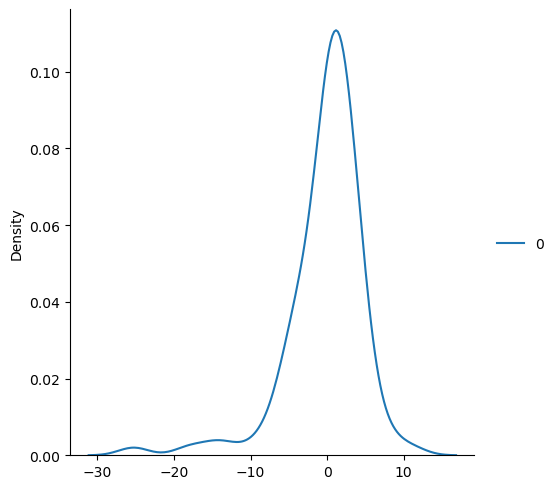

In [29]:
sns.displot(reg_pred-y_test,kind='kde')

In [30]:
from sklearn.metrics import r2_score

In [31]:
R_score=r2_score(y_test,reg_pred)

In [32]:
R_score

0.6687594935356322

Live testing

In [33]:
x1=np.array([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98]])
x1=sc.transform(x1)
y1=lr.predict(x1)
y1



array([[29.95339638]])